# 03 - Feature selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/heart_disease_clean.csv")
X = df.drop(columns=["target"])
y = df["target"]

# Temporary scaling for algorithms that need numeric matrix
X_temp_scaled = StandardScaler().fit_transform(X)
X_temp_df = pd.DataFrame(X_temp_scaled, columns=X.columns)


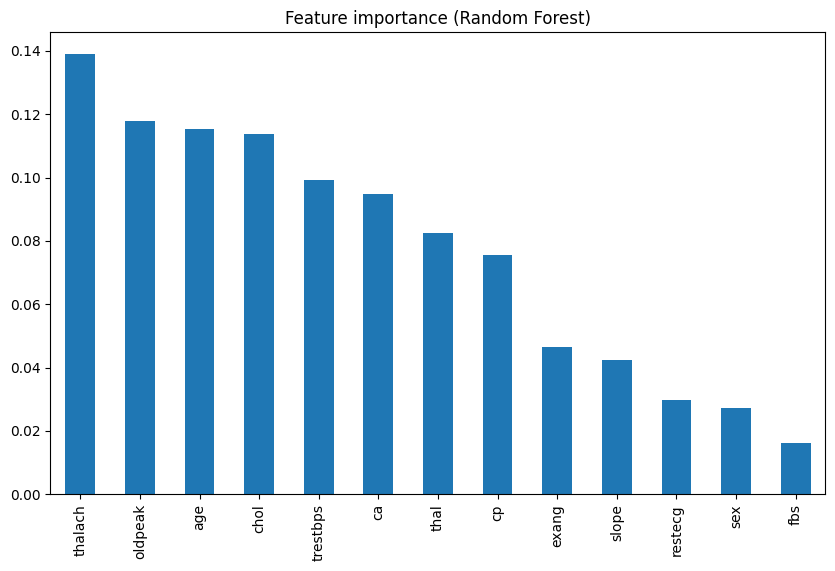

Top 10 features:
 thalach     0.138926
oldpeak     0.117851
age         0.115244
chol        0.113633
trestbps    0.099319
ca          0.094761
thal        0.082430
cp          0.075682
exang       0.046423
slope       0.042554
dtype: float64


In [2]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_temp_scaled, y)
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_importance.plot(kind='bar')
plt.title("Feature importance (Random Forest)")
plt.show()

print("Top 10 features:\n", feat_importance.head(10))


In [3]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(log_reg, n_features_to_select=10)
rfe.fit(X_temp_scaled, y)
selected_rfe = X.columns[rfe.support_].tolist()
print("RFE selected:", selected_rfe)


RFE selected: ['age', 'sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']


c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is depr

In [4]:
# chi2 requires non-negative; use absolute scaled values as quick workaround (not perfect)
chi2_selector = SelectKBest(score_func=chi2, k=10)
X_chi2 = chi2_selector.fit_transform(np.abs(X_temp_scaled), y)
chi2_features = X.columns[chi2_selector.get_support()].tolist()
print("Chi2 selected:", chi2_features)


Chi2 selected: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']


In [5]:
# Union of features from all methods
all_features = list(set(feat_importance.head(10).index) | set(selected_rfe) | set(chi2_features))
print(all_features)

# Rank features by Random Forest importance
all_features_sorted = sorted(all_features, key=lambda x: feat_importance[x], reverse=True)
print(all_features_sorted)

# Keep only top 9 features
selected_features = all_features_sorted[:9]

print("Final selected features (top 9 union):", selected_features)

# Create reduced dataset and save
X_selected = df[selected_features].copy()
X_selected['target'] = y
X_selected.to_csv("../data/heart_disease_selected.csv", index=False)

# Save feature names to model folder
import json
with open("../models/selected_features.json","w") as f:
    json.dump(selected_features, f)

print("Saved ../data/heart_disease_selected.csv and ../models/selected_features.json")



['age', 'oldpeak', 'thal', 'ca', 'thalach', 'cp', 'trestbps', 'slope', 'chol', 'restecg', 'fbs', 'sex', 'exang']
['thalach', 'oldpeak', 'age', 'chol', 'trestbps', 'ca', 'thal', 'cp', 'exang', 'slope', 'restecg', 'sex', 'fbs']
Final selected features (top 9 union): ['thalach', 'oldpeak', 'age', 'chol', 'trestbps', 'ca', 'thal', 'cp', 'exang']
Saved ../data/heart_disease_selected.csv and ../models/selected_features.json
